In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats

%matplotlib inline

In [12]:
data = fits.open("data/M33_VLASS1.2.fits")
data[0].header



SIMPLE  =                    T / Java FITS: Sun May 14 01:33:14 UTC 2023        
BITPIX  =                  -32 / Floating point (32 bit)                        
NAXIS   =                    4                                                  
NAXIS1  =                  242 / size of the n'th axis                          
NAXIS2  =                  242 / size of the n'th axis                          
NAXIS3  =                    1 / size of the n'th axis                          
NAXIS4  =                    1 / size of the n'th axis                          
EXTEND  =                    T / Extensions are permitted                       
BSCALE  =       1.000000000000 / PHYSICAL = PIXEL*BSCALE + BZERO                
BZERO   =                0E-12                                                  
BMAJ    =   0.0008541087971793                                                  
BMIN    =   0.0006304601165983                                                  
BPA     =       79.142509460

In [16]:
# Optical Graphs
def Optical(file,a):
    Galx_Img = fits.open(file)
    mean, median, std = sigma_clipped_stats(Galx_Img[0].data)
    plt.imshow(Galx_Img[0].data, vmin = median - a*std, vmax = median + a*std, cmap='plasma')
    plt.colorbar()

# Radio Graphs
def Radio(file,a):
    Galx_Radio = fits.open(file)
    RadioData = []
    for i in range(len(Galx_Radio[0].data[0][0])):
        RadioData.append(Galx_Radio[0].data[0][0][i])
    mean, median, std = sigma_clipped_stats(RadioData)
    plt.imshow(RadioData, vmin = median - a*std, vmax = median + a*std, cmap='viridis',origin='lower')


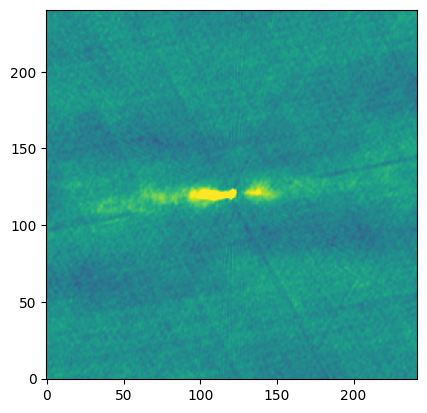

In [17]:
Radio('data/UGC_VLASS.fits',10)

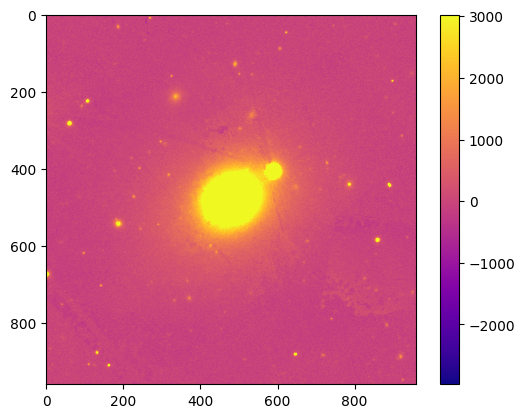

In [4]:
Optical('data/UGC_panSTARRS.fits',13)

In [5]:
Radio('data/M33_VLASS1.2.fits')

TypeError: Radio() missing 1 required positional argument: 'a'